Bryan Jay - 260738764

## 1 - Data Acquisition


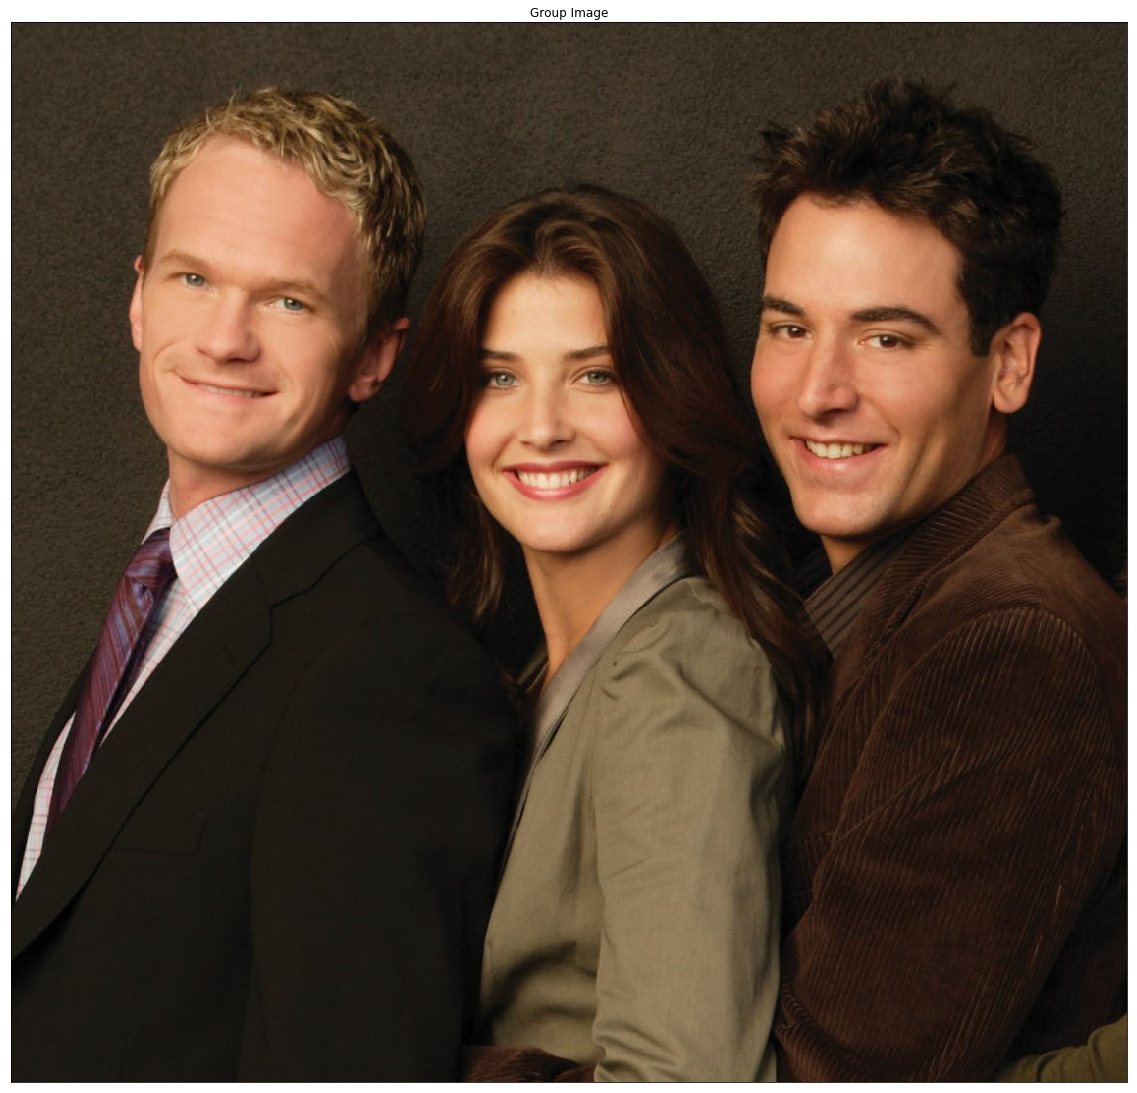

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

group_img = cv2.imread('./images/group-photo.jpg')

# display images
plt.figure(figsize=(20,20))
plt.subplot(111), plt.imshow(cv2.cvtColor(group_img, cv2.COLOR_BGR2RGB))
plt.title("Group Image"), plt.xticks([]), plt.yticks([])
plt.show()

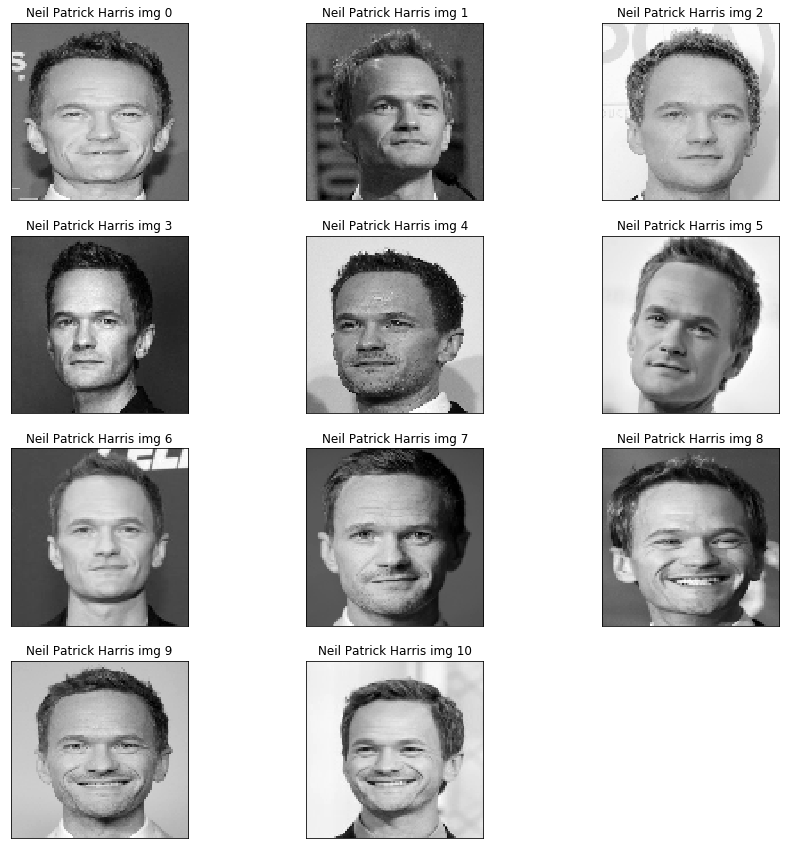

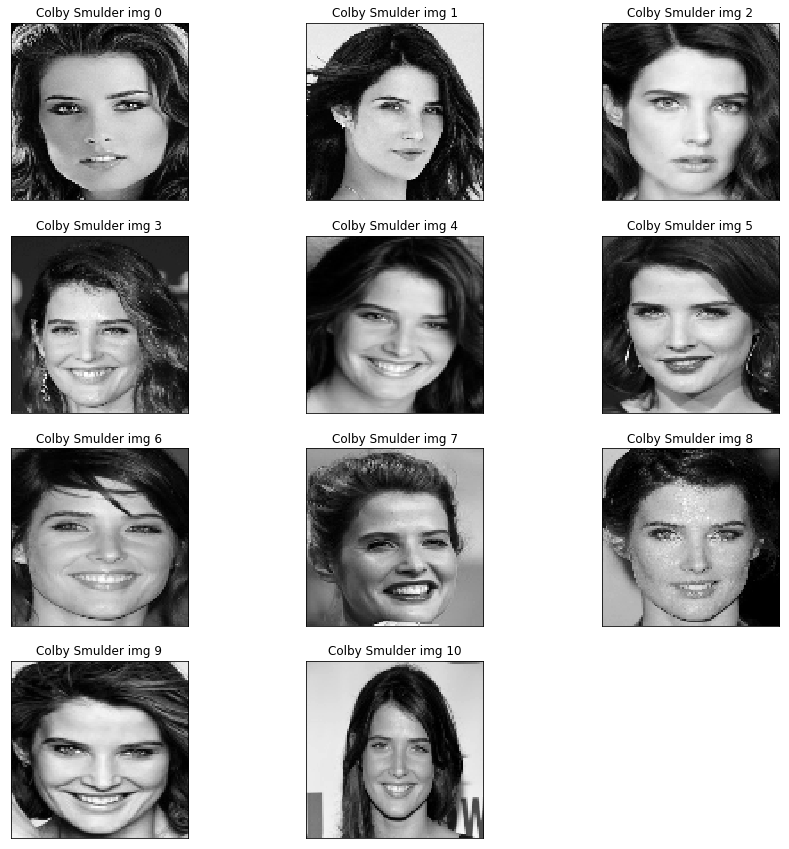

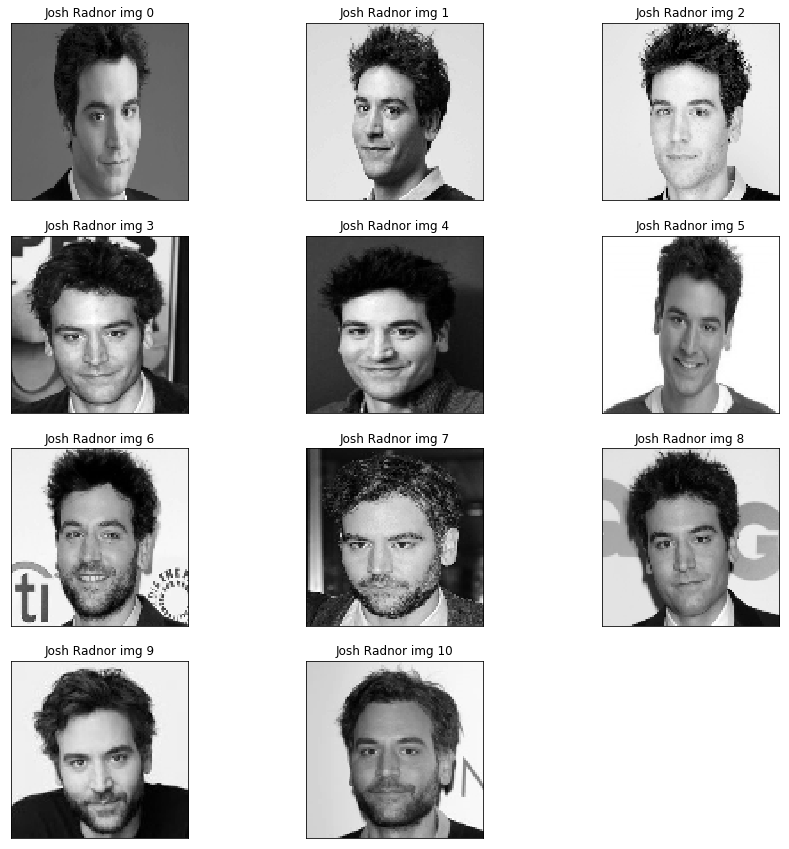

In [4]:
nph_img = []
cs_img = []
tm_img = []

size = (100,100)
for i in range(11):
    path = './images/{title}{index}.jpg'
    nph_resized = cv2.resize(cv2.imread(path.format(title='nph', index=i)), size)
    nph_img.append(cv2.cvtColor(nph_resized, cv2.COLOR_BGR2GRAY))
    
    cs_resized = cv2.resize(cv2.imread(path.format(title='cs', index=i)), size)
    cs_img.append(cv2.cvtColor(cs_resized, cv2.COLOR_BGR2GRAY))
    
    tm_resized = cv2.resize(cv2.imread(path.format(title='tm', index=i)), size)
    tm_img.append(cv2.cvtColor(tm_resized, cv2.COLOR_BGR2GRAY))


plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(4,3,1+i), plt.imshow(nph_img[i], cmap='gray')
    plt.title("Neil Patrick Harris img " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(4,3,1+i), plt.imshow(cs_img[i], cmap='gray')
    plt.title("Colby Smulder img " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(4,3,1+i), plt.imshow(tm_img[i], cmap='gray')
    plt.title("Josh Radnor img " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

I selected the group photo because they were all looking at the camera and the lighting was good in the image. Additionally the background is all black so there is good contrast between the background and the lighter faces of the 3 people. In order to chose the 33 images, I looked for images where the celeb had good lighting and the face was easy to see in the background. The group of images have different features in them, since i took some rotated differently, some with teeth showing and with the head slightly rotated as well. All the images are resized to (100,100) so that M = 10,000

## 2 - Eigenvector Representation

In [ ]:
# create the vector for each image, for the image
nph_vec = [np.reshape(nph_img[i], (nph_img[i].shape[0]*nph_img[i].shape[1],-1)) for i in range(len(nph_img))]
cs_vec = [np.reshape(cs_img[i], (cs_img[i].shape[0]*cs_img[i].shape[1],-1)) for i in range(len(cs_img))]
tm_vec = [np.reshape(tm_img[i], (tm_img[i].shape[0]*tm_img[i].shape[1],-1)) for i in range(len(tm_img))]

# put all the vectors into single array where each cell contains the image
nph_arr = np.hstack((nph_vec))
cs_arr = np.hstack((cs_vec))
tm_arr = np.hstack((tm_vec))

D = np.hstack((nph_arr, cs_arr, tm_arr))

# find the variance of the data
# get N 
N = D.shape[1]
# get the variances
var = [(1/(N-1)) * np.dot(np.dot(v.transpose(), np.dot(D, np.transpose(D))), v) for v in D.transpose()]

print(var)

[7.8125, 7.59375, 7.59375, 7.34375, 7.25, 6.9375, 6.78125, 6.71875, 6.59375, 5.21875, 4.96875, 4.875, 4.8125, 4.5, 4.3125, 3.78125, 3.6875, 3.28125, 3.0625, 2.9375, 2.75, 2.65625, 2.625, 2.34375, 2.0625, 1.21875, 1.09375, 1.03125, 0.9375, 0.78125, 0.75, 0.5625, 0.15625]


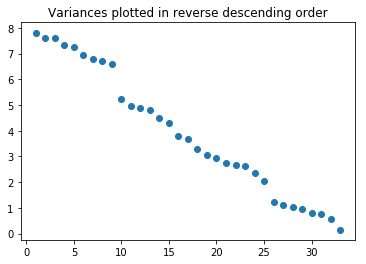

In [5]:
# plot the variance data in descending order 
variance = sorted(var, reverse=True)
print(variance)

plt.title('Variances plotted in reverse descending order')
plt.scatter(range(1, 34), variance)
plt.show()

In [1]:
print('hello')
# find D^2 
D2 = np.dot(D, np.transpose(D))
eig_vectors, eig_vals = np.linalg.eig(D2)

plt.scatter(range(1,10001), eig_vectors[1:10000])
plt.title('Eigen vectors displayed')
plt.show()

hello


NameError: name 'np' is not defined

In [ ]:
plt.scatter(range(1,10001), eig_vals[0])
plt.title('Eigen values distribution')
plt.show()